In [25]:
!pip install pytesseract

In [26]:
!pip install --upgrade pip

In [36]:
!pip install tesseract

  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562576 sha256=a1acd0ce83d024803c311484b7c07785a94d9437bb7520b2babc9ea75a095ac5
  Stored in directory: c:\users\liamc\appdata\local\pip\cache\wheels\01\3f\af\2f732560b9c4e51dd131bcbc6b7466a3124d15ab3fd393f85a
Successfully built tesseract


In [32]:
!pip install opencv-python

In [10]:
import io
import requests
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

response = requests.get('https://i.stack.imgur.com/HWLay.gif')
img = Image.open(io.BytesIO(response.content))
img = img.convert('L')
img = img.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(2)
img = img.convert('1')
img.save('image.jpg')
text = pytesseract.image_to_string(Image.open('image.jpg'))
print(text)

2HHH



In [2]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('image.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

2 HHH



In [14]:
import io
import requests
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

response = requests.get('https://www.datanumen.com/blogs/wp-content/uploads/2016/05/Outlook-insert-text-using-Quick-Parts.jpg')
img = Image.open(io.BytesIO(response.content))
img = img.convert('L')
img = img.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(2)
img = img.convert('1')
img.save('image_2.jpg')
text = pytesseract.image_to_string(Image.open('image_2.jpg'))
print(text)

TEXT



In [13]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('image_2.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

>4)



# Importing data

In [1]:
import pandas as pd
train_data = pd.read_csv('../raw_data/emnist-byclass-train.csv')
test_data = pd.read_csv('../raw_data/emnist-byclass-test.csv')
mapp = pd.read_csv("../raw_data/emnist-byclass-mapping.txt", delimiter = ' ',index_col=0, header=None, squeeze=True)

In [2]:
train_data.head()

,35,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Separating features/target

In [3]:
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

In [4]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

In [5]:
del train_data
del test_data

# Preparing data

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [8]:
X_train.shape

(697931, 784)

In [11]:
X_train = np.asarray(X_train)
X_train = np.apply_along_axis(rotate, 1, X_train)
print ("X_train:",X_train.shape)

X_train: (697931, 28, 28)


In [12]:
X_train[0].shape

(28, 28)

In [13]:
X_test = np.asarray(X_test)
X_test = np.apply_along_axis(rotate, 1, X_test)
print ("X_test:",X_test.shape)

X_test: (116322, 28, 28)


# Plotting Some Examples

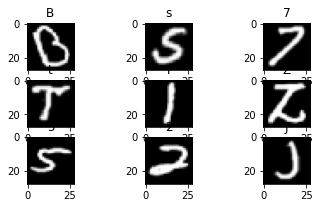

In [14]:
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(chr(mapp[y_train[i]]))

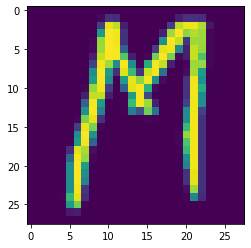

In [15]:
plt.imshow(X_train[3])

In [16]:
y_train[3]

22

In [17]:
chr(mapp[[y_train[3]]])

'M'

# Normalizing the data

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_test[0].shape

(28, 28)

# Expanding dimensions 

In [20]:
from tensorflow.keras.backend import expand_dims
import tensorflow as tf

X_train = tf.keras.backend.expand_dims(X_train, axis=-1)
X_test = tf.keras.backend.expand_dims(X_test, axis=-1)

In [22]:
X_train[0].shape

TensorShape([28, 28, 1])

In [17]:
y_train.unique()

array([36,  6,  3, 22, 38,  5,  9, 47,  4,  7, 56, 29, 40, 55, 57, 43, 32,
       15, 26,  2, 28,  8, 49, 12,  1, 59, 18, 41,  0, 46, 23, 51, 24, 31,
       45, 39, 11, 54, 35, 19, 20, 61, 25, 37, 52, 58, 14, 34, 30, 27, 16,
       33, 21, 60, 48, 53, 13, 10, 50, 17, 42, 44], dtype=int64)

# Encoding the target to a binary target

In [27]:
from tensorflow.keras.utils import to_categorical

y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=62)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=62)

In [28]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Lets split the data

not needed for the time being

# Lets create a model

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():
    model = models.Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(layers.AveragePooling2D())

    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(units=120, activation='relu'))

    model.add(layers.Dense(units=84, activation='relu'))

    model.add(layers.Dense(units=62, activation = 'softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [21]:
model = initialize_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)


history = model.fit(X_train, y_train_cat,
                    validation_split = 0.3,
                    epochs=10, 
                    batch_size=32,
                    callbacks = [es],
                    verbose=1)

Epoch 1/10
15268/15268 [==============================] - 180s 12ms/step - loss: 0.6144 - accuracy: 0.7984 - val_loss: 0.4625 - val_accuracy: 0.8384
Epoch 2/10
15268/15268 [==============================] - 176s 12ms/step - loss: 0.4425 - accuracy: 0.8423 - val_loss: 0.4249 - val_accuracy: 0.8475
Epoch 3/10
15268/15268 [==============================] - 178s 12ms/step - loss: 0.4102 - accuracy: 0.8511 - val_loss: 0.4142 - val_accuracy: 0.8506
Epoch 4/10
15268/15268 [==============================] - 183s 12ms/step - loss: 0.3932 - accuracy: 0.8560 - val_loss: 0.3990 - val_accuracy: 0.8551
Epoch 5/10
15268/15268 [==============================] - 176s 12ms/step - loss: 0.3813 - accuracy: 0.8591 - val_loss: 0.3903 - val_accuracy: 0.8580
Epoch 6/10
15268/15268 [==============================] - 182s 12ms/step - loss: 0.3727 - accuracy: 0.8620 - val_loss: 0.3842 - val_accuracy: 0.8597
Epoch 7/10
15268/15268 [==============================] - 186s 12ms/step - loss: 0.3660 - accuracy: 0.8634

In [24]:
evaluate = model.evaluate(X_test,y_test_cat)

3636/3636 [==============================] - 18s 5ms/step - loss: 0.3870 - accuracy: 0.8603


In [25]:
evaluate[1]

0.8602843880653381

# Plotting our perfomance

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

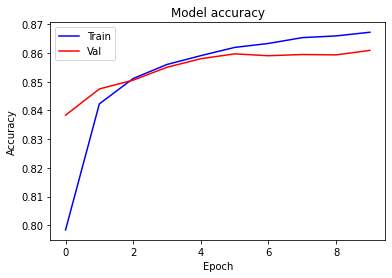

In [27]:
plt.plot(accuracy, 'b')
plt.plot(val_accuracy, 'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

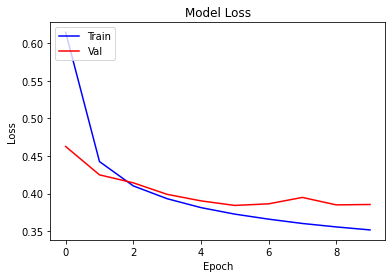

In [28]:
plt.plot(loss, 'b')
plt.plot(val_loss, 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Saving the model

In [29]:
model.save('../raw_data/neural_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../raw_data/neural_model\assets
